# 動物標本を用いた局所冷却実験の解析

## 解析するデータ
データは20170924にnumpyデータが入っている
- 2005-04-16-1/S0025
- 2005-08-24-2/S0011
- 2006-02-18-1/S0011

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import cv2
import copy
%matplotlib inline

In [3]:
from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap

## 旋回中心の移動経路を抽出したい

### 旋回中心の位置を取得

In [99]:
f = open('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170927/2005-04-16-1/C001S0025@/core.log')
lines = f.readlines()
f.close()

In [198]:
width = 1
core_map = np.zeros((128, 128))
for line in lines:
    data = line.split('\n')[0].split(' ')
    if int(float(data[0])) == 3013:
        x = int(float(data[3]))
        y = int(float(data[2]))
        print(data)
        print(x)
        print(y)
        core_map[y-width:y+width, x-width:x+width] = 1

['3.013000000000000000e+03', '1.170000000000000000e+02', '9.683333333333332860e+01', '3.000000000000000000e+01']
30
96


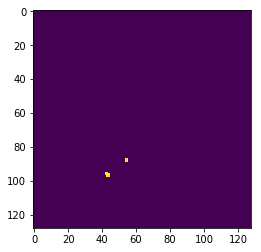

In [170]:
plt.imshow(core_map)

In [199]:
width = 1
core_map = np.zeros((128, 128))
for line in lines:
    data = line.split('\n')[0].split(' ')
    if int(float(data[1])) == 117:
        x = int(float(data[3]))
        y = int(float(data[2]))
        print(data)
        print(x)
        print(y)
        core_map[y-width:y+width, x-width:x+width] = 1

['3.013000000000000000e+03', '1.170000000000000000e+02', '9.683333333333332860e+01', '3.000000000000000000e+01']
30
96


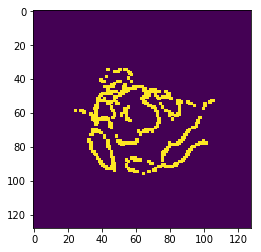

In [167]:
plt.imshow(core_map)

### カメラデータ取得

In [102]:
cam = RawCam(path='/mnt/recordings/ExperimentData/2005-04-16-1/C001S0025@',
             cam_type='sa4',
             image_width=256, image_height=256,
             frame_start=0, frame_end=10)

In [118]:
back_ground = cv2.resize(cam.data[0]/np.max(cam.data[0]), (128, 128))

### 旋回中心の位置をミックス

In [143]:
color_image = np.zeros((128, 128, 3))
color_image[:, :, 0] = back_ground * (1-core_map) + core_map
color_image[:, :, 1] = back_ground * (1-core_map)
color_image[:, :, 2] = back_ground * (1-core_map)

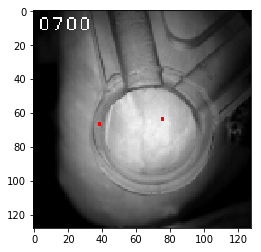

In [144]:
cv2.putText(color_image, "{0:0>4}".format(700), (2,12), cv2.FONT_HERSHEY_PLAIN,0.8,(1,1,1))
plt.imshow(color_image)

### 2005-04-16-1

In [149]:
f = open('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170927/2005-04-16-1/C001S0025@/core.log')
lines = f.readlines()
f.close()

cam = RawCam(path='/mnt/recordings/ExperimentData/2005-04-16-1/C001S0025@',
             cam_type='sa4',
             image_width=256, image_height=256,
             frame_start=0, frame_end=10)

back_ground = cv2.resize(cam.data[0]/np.max(cam.data[0]), (128, 128))

In [194]:
time = 0
width = 2
time_lapse = 0.98
core_map = np.zeros((128, 128))
center_ids = [29, 42, 49, 70, 88, 89, 91, 92]
while time < 3000:
    core_map = core_map * time_lapse

    for line in lines:
        data = line.split('\n')[0].split(' ')
        if int(float(data[1])) in center_ids and int(float(data[0])) == time:
            x = int(float(data[3]))
            y = int(float(data[2])) 
            core_map[y-width:y+width, x-width:x+width] = 1
    color_image = np.zeros((128, 128, 3))
    color_image[:, :, 2] = (back_ground * (1-core_map) + core_map) * 255
    color_image[:, :, 1] = back_ground * (1-core_map) * 255
    color_image[:, :, 0] = back_ground * (1-core_map) * 255
    cv2.putText(color_image, "{0:0>4}".format(time), (2,12), cv2.FONT_HERSHEY_PLAIN,0.8,(255,255,255))
    cv2.imwrite('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170928/2005-04-16-1/C001S0025@/SW/{0:0>6}.png'.format(time), color_image)
    
    time += 1

In [200]:
cmd = 'ffmpeg -r 30 -y -i "{0}/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "{0}/movie.mp4"'.format('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170928/2005-04-16-1/C001S0025@/SW')
subprocess.call(cmd, shell=True)

0